In [1]:
# The goal of this notebook is to analyze the results for the sensitivity analysis carried out for seven winter days.
# This notebooks include the usage of several tools: 
#    -   Correlation among different input variables and savings
#    -   Evaluation of savings regarding the efficiency and number of cars
#    -   Principal Components Analysis to determine the main variables that explain the achieved savings 
#    -   Multivariable linear regression model that explain the achieved savings 

In [2]:
# HIGHLIGHTS
#   - The greater the number of cars, the larger the savings
#   - The efficiency of the charging/discharging process is a key variable in determining savings 
#     (the tested efficiencies are 90%, 95% and 99%, but only with a efficiency of 99 % 
#     the achieved savings are significant)
#   - The maximum percentage of savings is achieved with intermediate charger power and energy storage
#   - The maximum percentage of savings is achieved with the lowest average of initial energy (I guess that as the
#     usage of the battery is larger, more energy can be sold (you can discharge from 100 % to around 60 %))

In [27]:
# Libraries

import pandas as pd
import seaborn as sns

#To read plot axis in Dark Reader Chrome Extension (remove if not using this mode)
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [28]:
#Getting the data from the sensitivity analysis

# The columns in the dataframe are: 

# Number of vehicles || EV charger power (MW) || Energy storage of the vehicle (MWh) || Efficiency of dis/charging
# Average initial energy of the vehicles # Total savings with storage ($) || Original cost without storage ($)

data = pd.read_pickle("./results_97.pkl")
#data = data[0:405]

print("Number of rows: " + str(len(data)))

# Preview
data.head()


Number of rows: 945


,num_vehicles,charger_power,energy_vehicle,efficiency,avg_initial_energy,total_savings,total_original_cost
0,20,0.006,0.04,0.90,0.6,4.187870e-14,269.155896
1,20,0.006,0.04,0.90,0.7,2.960115e-14,269.155896
2,20,0.006,0.04,0.90,0.8,6.055245e-14,269.155896
3,20,0.006,0.04,0.95,0.6,6.282150e-01,269.155896
4,20,0.006,0.04,0.95,0.7,6.275743e-01,269.155896


In [29]:
# #Size of the storage
# num_vehicles = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# #Battery specifications
# charger_power = [0.006, 0.0072, 0.0008] #MW
# energy_vehicle = [0.040, 0.064, 0.080] #MWh
# eff = [0.9, 0.95, 0.97] #eficiency 
# avg_initial_energy = [0.6, 0.7, 0.8]



# df_test_combinations = pd.DataFrame(columns = ['num_vehicles','charger_power','energy_vehicle', 
#                                                'eff', 'avg_initial_energy', 'done'])

# for n in num_vehicles: 
#     for c in charger_power: 
#         for e in energy_vehicle: 
#             for ef in eff: 
#                 for i in avg_initial_energy: 

                    
#                     df_new_row = pd.DataFrame([[n,c,e,ef,i,0]],columns = ['num_vehicles','charger_power',
#                                                                           'energy_vehicle','eff', 'avg_initial_energy', 'done'])
#                     df_test_combinations = df_test_combinations.append(df_new_row, ignore_index=True)



In [30]:
# hola = pd.concat([df_test_combinations.iloc[0:len(data),0:5],data.iloc[:,5:7]], axis=1)
# hola = hola[0:810] 
# data = hola
# hola

In [31]:
# Correlation matrix among different columns

correlation_df = data.corr()
correlation_df

,num_vehicles,charger_power,energy_vehicle,efficiency,avg_initial_energy,total_savings,total_original_cost
num_vehicles,1.000000e+00,-9.355400e-03,-7.587821e-03,-7.447734e-04,-8.951062e-04,1.853418e-01,6.595785e-15
charger_power,-9.355400e-03,1.000000e+00,4.707388e-03,4.620479e-04,5.553125e-04,2.189707e-01,8.056201e-15
energy_vehicle,-7.587821e-03,4.707388e-03,1.000000e+00,4.741567e-19,2.395805e-17,4.366585e-02,3.886760e-14
efficiency,-7.447734e-04,4.620479e-04,4.741567e-19,1.000000e+00,5.422211e-19,5.899175e-01,-2.136844e-13
avg_initial_energy,-8.951062e-04,5.553125e-04,2.395805e-17,5.422211e-19,1.000000e+00,-1.914447e-01,-4.983794e-14
total_savings,1.853418e-01,2.189707e-01,4.366585e-02,5.899175e-01,-1.914447e-01,1.000000e+00,-1.340617e-16
total_original_cost,6.595785e-15,8.056201e-15,3.886760e-14,-2.136844e-13,-4.983794e-14,-1.340617e-16,1.000000e+00


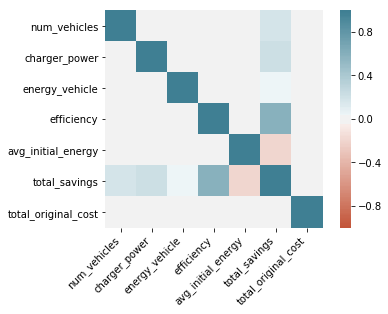

In [32]:
#Plotting the correlation among the different variables

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#ax.set_title("Correlation matrix plot")

In [23]:
#Addition of a new column to the results dataframe that shows the percentage of savings in each combination 

data['percentage_savings'] = data['total_savings']/data['total_original_cost']*100

# Looking for the combination with maximum percentage of savings

index_maxValue = data['percentage_savings'].idxmax()
maxValue = data['percentage_savings'].max() 

data.iloc[index_maxValue,:]

num_vehicles           200.000000
charger_power            0.007200
energy_vehicle           0.080000
efficiency               0.970000
avg_initial_energy       0.600000
total_savings           33.838771
total_original_cost    269.155896
percentage_savings      12.572183
Name: 780, dtype: float64

In [24]:
data["num_vehicles"] = data.num_vehicles.astype(float)
data = data.rename({'eff': 'efficiency'}, axis='columns')

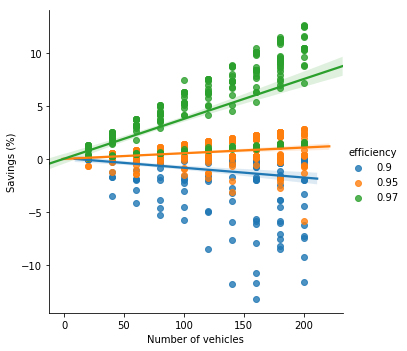

In [25]:
# Graph that shows the savings for each combination, dividing them in three main groups regarding efficincy 
# Note that efficiency seems to be one of the most relevant factor as it has a larger correlation with savings

graph_efficiency = sns.lmplot(x="num_vehicles", y="percentage_savings", hue="efficiency",height=5, data=data)

#graph_efficiency = sns.lmplot(x="num_vehicles", y="percentage_savings", hue="eff",height=5, data=data)

# Use more informative axis labels than are provided by default
graph_efficiency.set_axis_labels("Number of vehicles", "Savings (%)")

In [12]:
# PRINCIPAL COMPONENTS ANALYSIS


from sklearn.preprocessing import StandardScaler


features = ['num_vehicles', 'charger_power', 'energy_vehicle', 'efficiency', 'avg_initial_energy']

target = ['percentage_savings']

# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data.loc[:,target]], axis = 1)


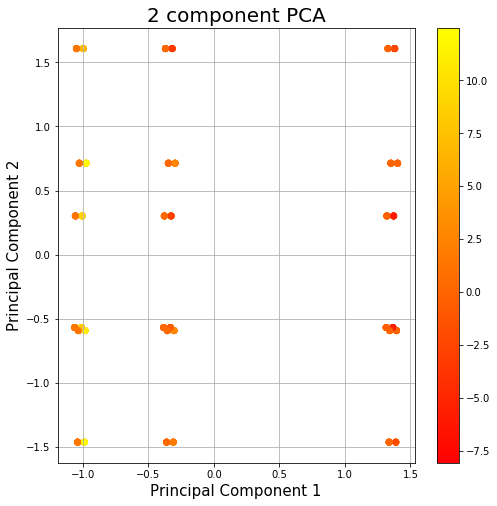

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

x = finalDf['principal component 1']
y = finalDf['principal component 2']

plt.scatter(x, y,c=finalDf['percentage_savings'], cmap=plt.cm.autumn)

plt.colorbar()

ax.grid()

In [14]:
# Evaluation of the PCA analysis
# References: https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

pca.explained_variance_ratio_

#Variance explained
print("Variance explained: " + str(sum(pca.explained_variance_ratio_)*100) +" %")

# Most relevant variables
print(abs( pca.components_))

# It seems that for PC1, the main variables are "num_vehicles" and "charger_power,"
# For PC2, the main variables are "energy_vehicle" and "efficiency"


Variance explained: 40.000000000000014 %
[[0.         0.02565617 0.00555065 0.99959377 0.0111013 ]
 [0.         0.         0.89442719 0.         0.4472136 ]]


In [15]:
# MULTIPLE VARIABLE LINEAR REGRESSION MODEL

# References: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

from sklearn import linear_model

features = ['num_vehicles', 'charger_power', 'energy_vehicle', 'efficiency', 'avg_initial_energy']

target = ['percentage_savings']

# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,target].values

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)

evalDF = data.loc[:,target]
evalDF = evalDF.rename(columns={ "percentage_savings": "Original"})
evalDF['Predicition']=predictions
evalDF.head()

,Original,Predicition
0,1.904308e-14,-1.039808
1,-1.984952e+00,-2.165542
2,2.674457e-01,1.749715
3,2.167084e-01,0.623980
4,1.255978e+00,2.865524


In [16]:
# Evaluation of the model

# R2 score: 
print("R2 square: " + str(lm.score(x,y)))

# Intercept
print("Intercept = " + str(lm.intercept_))

# Coefficients
print("Coefficients = " + str(lm.coef_))


R2 square: 0.38801444353721815
Intercept = [-45.35461337]
Coefficients = [[ 8.75341643e-03  2.09989862e+02  7.41371616e+00  5.57904468e+01
  -1.12573433e+01]]


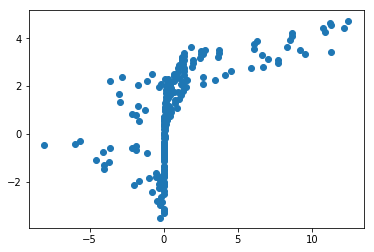

In [17]:
# This should be a line with slope 1

plt.scatter(x = evalDF['Original'],y = evalDF['Predicition'])